## E-commerce 

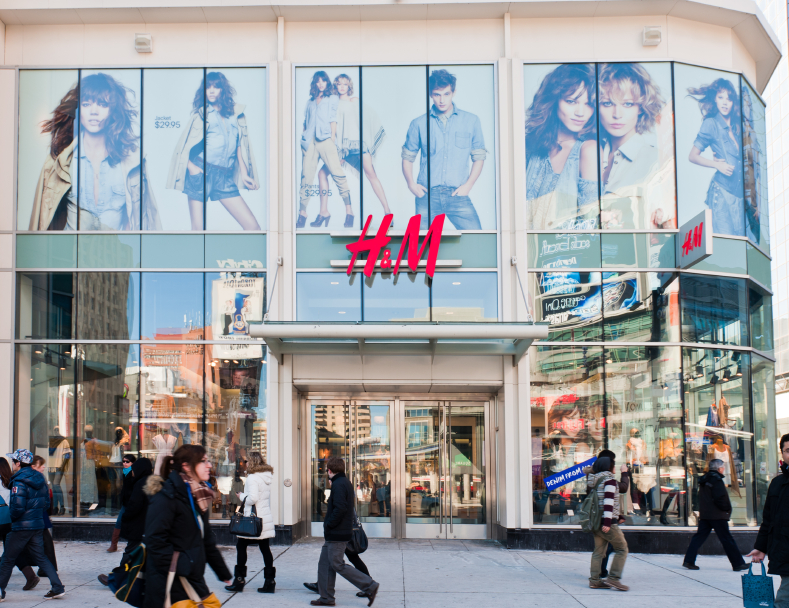

## Projeto E-commerce 

Um grande e-commerce disponibilizou seus dados afim de uma solução para resolver um problema de negócio, a empresa de comércio eletrônico com sede na cidade de Nova York que vende roupas online, mas também tem sessões de consultoria em estilo e vestuário na loja. Os clientes entram na loja, têm sessões / reuniões com um estilista pessoal, então podem ir para casa e encomendarem em um aplicativo móvel ou site para a roupa que desejam.

### Problema de negócio 
A empresa está tentando decidir se deve concentrar seus esforços em sua experiência em aplicativos móveis ou em seu site.

### Objetivo 

Através dos dados disponiveis vamos utilizar de Machine Learning para a construção de um modelo preditivo que preveja o valor anual gasto e análisar posteriormente qual plataforma deve ser mantida que menos gastos ao E-commerce e que alavanca a experiência do usuário.

### Dicionário dos dados 

Trabalharemos com o arquivo csv do Ecommerce Customers da empresa. Possui informações do cliente, como Email, Endereço e sua cor Avatar. Em seguida, ele também possui colunas de valores numéricos:.

* Avg. Session Length: Tempo médio das sessões de consultoria de estilo na loja.
* Time on App: tempo médio gasto no app em minutos.
* Time on Website: tempo médio gasto no site em minutos.
* Lenght of Membership: Há quantos anos o cliente é membro.
* Yearly Amount Spent: Valor anual Gasto 

##### Vamos trabalhar apenas em cima destas colunas 

<html> 

### Importando Bibiotecas 

In [178]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 
% matplotlib inline 

import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.externals import joblib

In [179]:
# Importando dataset 

ecommerce = pd.read_csv('ecommerce')

print('Linhas {}, Colunas {} '.format(ecommerce.shape[0], ecommerce.shape[1]))
ecommerce.head()

Linhas 500, Colunas 8 


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [180]:
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [181]:
ecommerce.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


O Std é bem baixo em quase todas as variáveis somente em Yearly Amount Spent temos um valor bem alto, vamos tentar enteder mais sobre cada variável. Além de termos poucos dados não será necessario uma análise para verificar Outliers, iremos ver isso mais a frente com algumas Visualizações. 

A média de tempo gasto no Site é bem acima do que no Aplicativo. 

In [182]:
# Verificando tipo de dados 
ecommerce.dtypes

Email                    object
Address                  object
Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object

### Pré-Processamento 

Vamos fazer uma análise em busca de ruídos nos dados, tentando encontrar valores nulos, e tirar análises sobre o dataset. 

In [183]:
# Excluindo colunas. 

ecommerce.drop(columns=['Email', 'Address', 'Avatar'], inplace=True)
ecommerce.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [184]:
# Função Missing Values 

def missing_values(data):
    
    # Total de Nulos
    missing_values = data.isnull().sum()
    
    # Ordenando valores nullos 
    total = missing_values.sort_values(ascending=True)
    
    # Porcentagem 
    percent = (missing_values / len(data.index)*100).round(2).sort_values(ascending=True)

    table_missing = pd.concat([total, percent], axis=1, keys=['Números de NA', 'Porcentagem de NA'])
      
    """  
         Está Função irá retornar um resumo de missing_values
         do conjunto de dados. 
    """
    return table_missing 

In [185]:
clean_columns(ecommerce, 'Avg. Session Length')

0    34.497268
1    31.926272
2    33.000915
3    34.305557
4    33.330673
Name: Avg. Session Length, dtype: float64

In [186]:
missing_values(ecommerce)

,Números de NA,Porcentagem de NA
Avg. Session Length,0,0.0
Time on App,0,0.0
Time on Website,0,0.0
Length of Membership,0,0.0
Yearly Amount Spent,0,0.0


Não há valores nulos no Dataset 

### Visualizações 

In [200]:
# Verificando Distribuições 

def plot_dist(data, column):
    
    # Plot Distribuição 
    fig, axe = plt.subplots(figsize=(12,6))

    plt.title('Distribuição ' + column)
    return sns.distplot(data[column], color='blue')

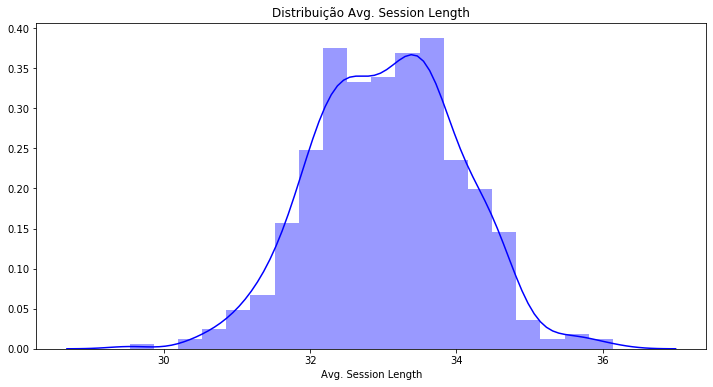

In [201]:
plot_dist(ecommerce,'Avg. Session Length')

In [224]:
# Valores que mais aparece na coluna Avg Session Length 
ecommerce['Avg. Session Length'].mode().sort_values(ascending=False).head(5)

499    36.139662
498    35.860237
497    35.742670
496    35.630854
495    35.530904
dtype: float64

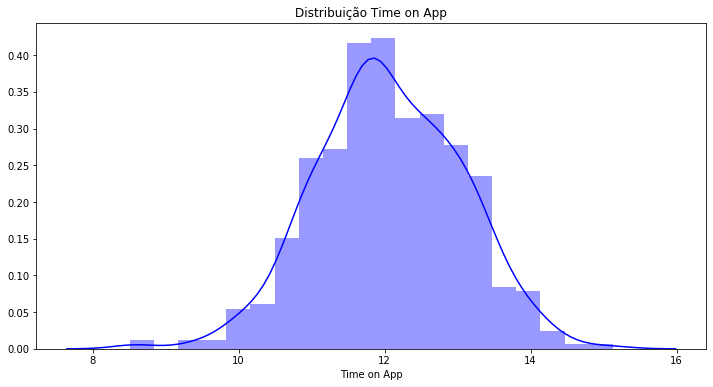

In [203]:
plot_dist(ecommerce, 'Time on App')

In [204]:
ecommerce['Time on App'].mode().head(5)

0    8.508152
1    8.668350
2    9.316289
3    9.477778
4    9.607315
dtype: float64

0    33.913847
1    34.476878
2    34.487185
3    34.574028
4    34.649800
dtype: float64

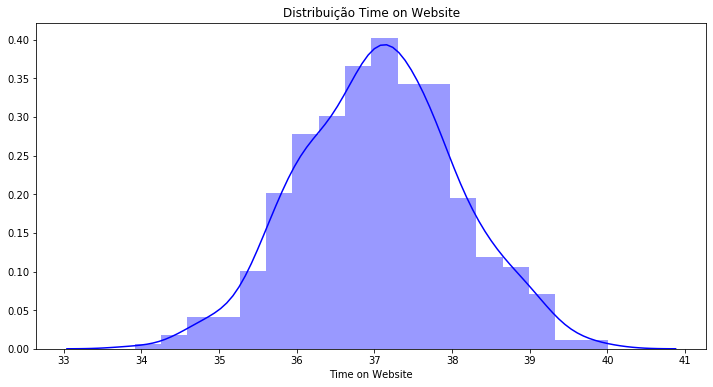

In [209]:
plot_dist(ecommerce, 'Time on Website')

In [222]:
ecommerce['Time on Website'].mode().sort_values(ascending=False).head(5)

499    40.005182
498    39.672591
497    39.600376
496    39.577668
495    39.294043
dtype: float64

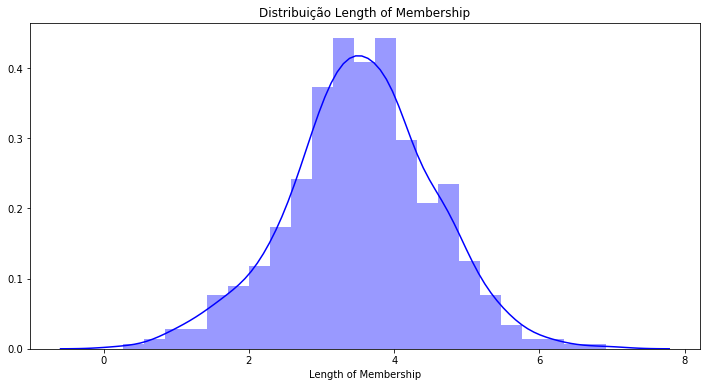

In [211]:
plot_dist(ecommerce,'Length of Membership')

In [228]:
ecommerce['Length of Membership'].mode().sort_values(ascending=False).head(5)

499    6.922689
498    6.401229
497    6.115199
496    6.076654
495    5.976768
dtype: float64

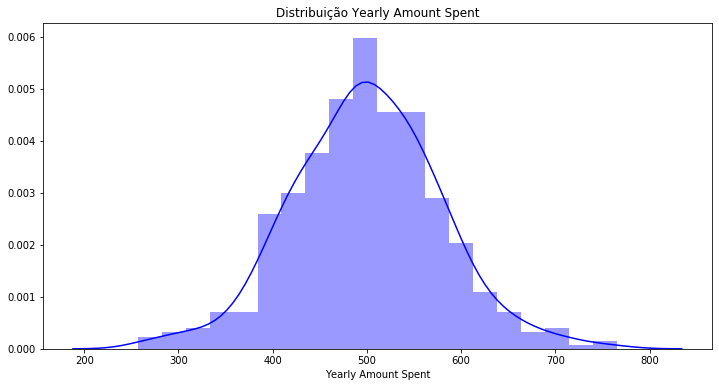

In [216]:
plot_dist(ecommerce,'Yearly Amount Spent')

In [225]:
ecommerce['Yearly Amount Spent'].mode().sort_values(ascending=False).head(5)

499    765.518462
498    744.221867
497    725.584814
496    712.396327
495    708.935185
dtype: float64

#### Distribuições 

* <b> Avg. Session Lengh - </b> A distribuição apresentou uma semelhança com uma distribuição normal, mas tende a ser quase bimodal pois possui dois valores com moda que estão bem lado a lado com uma diferença mínima. Sua Curtose é fina e curta não apresentand o sinais de outliers. Como esta Feature já está na medida de Média os clientes ficam cerca de 29-30 minutos em Consultoria são os valores que aparecem com mais frequência. 
 
 * <b> Time on App - </b> A distribuição não apresentou grande indicios de Outliers assim que a Curtose é fina e curta. Vejamos que no Aplicativo os Clientes gastam e média a maioria deles de 8-9 minutos. 
 
 * <b> Time on Website - </b> A distribuição sobre do Tempo médio gasto no site chama atenção a frequência que foi vista é entre 33-34 minutos de uso do site.O que mostra é que são números bem acima do uso de clientes no App. 
 
 * <b> Length of Membership - </b> A distribuição desta feature  mostra que podemos ser explorada mais a frente em particular, a relação de dela com as demais, é uma variável que mostra quantos anos de fidelização o cliente tem com o e-commerce os números mostram que  entre 3 e 4 anos de fidelização são os clientes com mais tempo de fidelização com a loja. 
 
 * <b> Yearly Amount Spent - </b> A distribuição da target do conjunto de dados mostrou valores altíssimos, a maior frequência de Gastos está na faixa de 744 há 765 milhões por ano. O modelo que deve ser feito deve reduzir os gastos anuais. 

In [266]:
def plot_scatter(x, y, data):
        
    sns.lmplot(x=x, y=y, data=data)
    plt.title('Relação Linear')

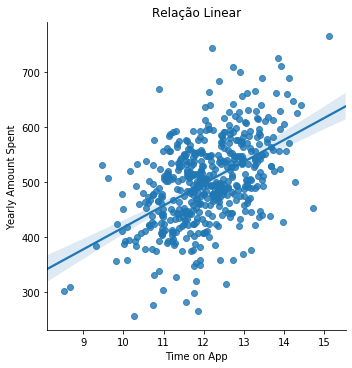

In [267]:
plot_scatter(x='Time on App', y='Yearly Amount Spent', data=ecommerce)

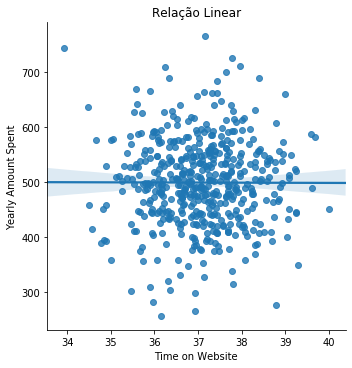

In [272]:
plot_scatter(x='Time on Website', y='Yearly Amount Spent', data=ecommerce)

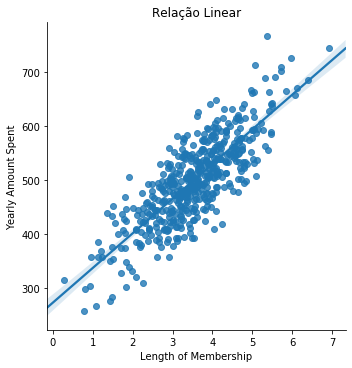

In [271]:
plot_scatter(x='Length of Membership', y='Yearly Amount Spent', data=ecommerce)

 Uma correlação positiva entre Anos de fidelização do Cliente com os Gastos anuais, quanto maior o tempo de fidelização do cliente com o e-commerce maior são os gastos por ano, mas não podemos tornar isto absoluto pois pode haver causalidade ou não. 

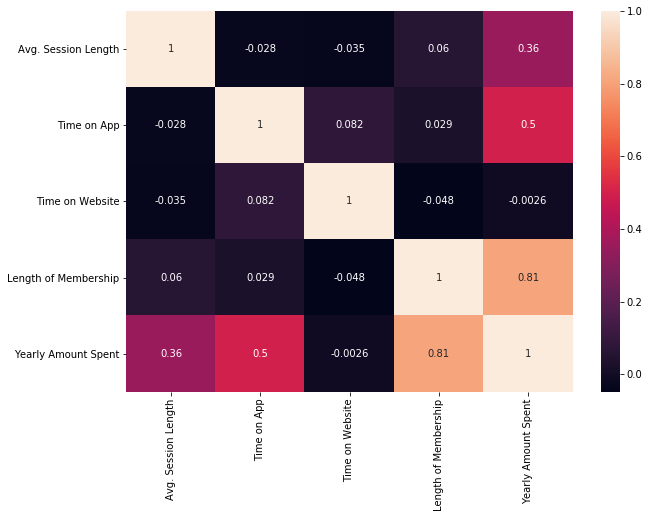

In [278]:
# Gráfico de Correlação 

correlacao = ecommerce.corr()

fig, axe = plt.subplots(figsize=(10,7))
sns.heatmap(correlacao, annot=True)

Este Plot de correlação mostra bem o que tinha visto com gráfico de dispersão, a relação do Website com os Gastos anuais tem uma correlação fraca negativa, apontando que Gastos anuais altos, baixo acesso no Website e vice-versa este é o comportamento de uma correlação negativa. Uma forte correlação entre os Gastos anuais e o tempo de fidelização de seus cliente com 0.81 um valor alto.

<html> ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</html>

<html>

## Regressão Linear

Após toda a análise do dataset vamos construir um modelo de Regressão Linear, vou utilizar este algoritmo que tem uma abordagem um pouco mais simples para este problema de negócio, optarei pelo mais simples antes de partir para uma solução mais robusta com algoritmos mais complexos, Vamos pelo simples e escalando conforme o necessário.  

Modelos de regressão, são modelos matemáticos que relacionam o comportamento de uma variável Y com outra X, a variável X é a variável independente, que são as entradas do modelo, a variável Y é a variável dependente, que é saída do modelo. O modelo é chamado de simples quando envolve apenas duas variáveis e múltiplo quando possui mais de duas variáveis.

Uma variável independente x, explica a variação em outra variável, que é chamada de variável dependente Y. Este relacionamento existe em apenas um direção.
variável independente (x) -> variável dependente (y)

Análise de regressão é uma metodologia estatística que utiliza a relação entre duas ou mais variáveis quantitativas de tal forma que uma variável possa ser predita a partir de outra.


O objetivo da regressão linear é buscar a equação de uma linha de regressão que minimize a soma dos erros ao quadrado, da diferença entre o valor observado de Y e o valor previsto.

<b>Fórmula da regressão</b>

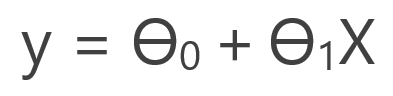

### Modelagem 

In [299]:
# Separadando em treino e teste 

X = ecommerce[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

y = ecommerce['Yearly Amount Spent']

# Aplicando train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=12)


# Treinando o modelo em dados de treinamento 

model = LinearRegression()

model.fit(X_train, y_train)

print('Coeficientes: \n ', model.coef_)

Coeficientes: 
  [25.45289338 39.06622076  0.28818698 61.76361157]


Text(0, 0.5, 'Predicted Y ')

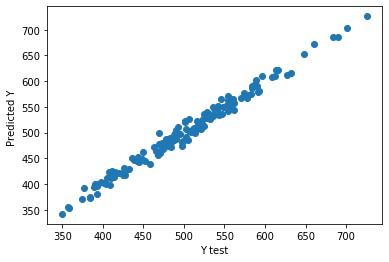

In [300]:
# Prevendo no conjunto de teste

predictions = model.predict(X_test)

plt.scatter(y_test, predictions)
plt.xlabel('Y test')
plt.ylabel('Predicted Y ')

Um gráfico de dispersão para análisar as predições do modelo mostrando o quão bem ou mal foi o modelo. <br> <br>
<b> Eixo X = Valores do reais do Y de teste </b> <br> <br>
<b> Eixo Y = Valores preditos no Y de teste  </b> 


<html> </html>

### Avaliando o modelo 

Vamos avaliar o desempenho do nosso modelo calculando a soma residual dos quadrados e o score de variância explicado.

### Métricas de avaliação de regressão


Aqui estão três métricas de avaliação comuns para problemas de regressão:

**Mean absolute error ** (erro absoluto médio) (MAE) é a média do valor absoluto dos erros:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

** Mean Squared Error ** (erro médio quadrático) (MSE) é a média dos erros quadrados:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

** Root Mean Square Error ** (raiz do erro quadrático médio) (RMSE) é a raiz quadrada da média dos erros quadrados:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparando estas métricas:

- **MAE** é o mais fácil de entender, porque é o erro médio.
- **MSE** é mais popular que o MAE, porque a MSE "puniria" erros maiores, o que tende a ser útil no mundo real.
- **RMSE** é ainda mais popular do que MSE, porque o RMSE é interpretável nas unidades "y".

Todas estas são ** funções de perda **, porque queremos minimizá-las.

In [317]:
# Métricas 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

print('MAE: ', mean_absolute_error(y_test, predictions))
print('MSE: ', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R^2: ', r2_score(y_test, predictions))

MAE:  7.602998610621055
MSE:  91.33986453504924
RMSE: 9.557189154508205
R^2:  0.9831126344070339


In [312]:
# plotando coeficientes

coeffecients = pd.DataFrame(model.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.452893
Time on App,39.066221
Time on Website,0.288187
Length of Membership,61.763612


Interpretando os coeficientes:

**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidade na média de tempo de uso está associado a um aumento de 25,98 dólares totais gastos.

**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidade no tempo gasto no App está associado a um aumento de 38,59 dólares totais gastos.

**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidade no tempo no site está associado a um aumento de 0,19 dólares em dólares.

**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidade no tempo de Associação está associado a um aumento de 61,27 dólares em dólares.

In [318]:
# Salvando modelo 

filename = 'linear_reg.sav'
joblib.dump(model, filename)

 
# Carregar modelo 
#  loaded_model = joblib.load(filename)
#  result = loaded_model.score(X_test, Y_test)
#  print(result)

['linear_reg.sav']

## Conclusão 
<br>
Avaliando as métricas do modelo obtivemos um modelo considerado muito bom com apenas 500 linhas no dataset e poucas features que realmente tinham uma importancia grande. O modelo teve um R^2 de 0.98 que mostra que a a adaptabilidade de novos dados serão bastante apróximados da reta da regressão, MAE de 7.60 mostrando ser baixo e consideravél. Resumindo tudo o projeto foi concluído com sucesso, o modelo será melhorado posteriormente utilizando gradient descendente e outra técnicas de otimização, mas atualmente está atendendo o previsto e deve ser colocado em produção. 

** A empresa deve se concentrar mais em seu aplicativo móvel ou em seu site? **
A pergunta foi respondida pelo modelo claramente com as análises e com o modelo, a feature de fidelização do cliente é altamente impactante no modelo com uma correlação considera muito forte. A resposta é que o e-commerce deve investir em formas de fidelizar seu cliente a longo prazo a plataforma seja ela App ou Website não apresentaram um impacto grande, mas a fidelização do cliente deve ser o foco. 